In [4]:
import os
import pandas as pd
import numpy as np
import nibabel as nib
# sliced 3D real image
import warnings
warnings.filterwarnings("ignore")


import numpy as np
from concurrent.futures import ProcessPoolExecutor
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorly as tl

#Debugging import
import importlib
var = 'TensorDecisionTreeRegressorP' #the published version of code
package = importlib.import_module(var)
for name, value in package.__dict__.items():
    if not name.startswith("__"):
        globals()[name] = value

from TensorDecisionTreeRegressorP import *

import os
import nibabel as nib
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file containing PTID and target variable
csv_file = '/Users/zc56/Documents/CommenDesktop/RICE/MyProject/Bayes_Tensor_Tree/3D-images/ADNIData.csv'
df = pd.read_csv(csv_file)

# Extract PTID and target values from the DataFrame
ptid_csv = df['PTID'].values
y_variable = df['ADAS11'].values

# Directory containing the image files
directory = '/Users/zc56/Documents/CommenDesktop/RICE/MyProject/Bayes_Tensor_Tree/3D-images/3D-Images/bl'

# Initialize lists for storing matched images and corresponding y values
matched_images = []
matched_y_values = []

# Loop through the image files and match by PTID
for filename in os.listdir(directory):
    if filename.endswith('.nii.gz'):
        # Extract PTID from the filename (e.g., '002_S_0295.nii.gz' -> '002_S_0295')
        ptid_image = filename.split('.')[0]  # Keep the '002_S_0295' format with underscores
        
        # Find the index of this PTID in the CSV data
        if ptid_image in ptid_csv:
            index = np.where(ptid_csv == ptid_image)[0][0]  # Get the index of the matching PTID
            y_value = y_variable[index]  # Get the corresponding target value

            # Skip if the corresponding y_value is NaN
            if np.isnan(y_value):
                print(f"Skipping PTID '{ptid_image}' because y_value is NaN.")
                continue

            # Load the image
            file_path = os.path.join(directory, filename)
            img = nib.load(file_path)
            data = img.get_fdata()

            # Append the image data and the corresponding y_value to the lists
            matched_images.append(data)
            matched_y_values.append(y_value)
        else:
            print(f"PTID '{ptid_image}' not found in the CSV file.")

# Convert the matched images and y values into arrays
if matched_images:
    image_tensor = np.stack(matched_images, axis=0)
    y_variable = np.array(matched_y_values)
    print(f"Aligned image tensor shape: {image_tensor.shape}")
    print(f"Aligned y variable shape: {y_variable.shape}")
else:
    print("No images matched.")

Skipping PTID '013_S_0699' because y_value is NaN.
Aligned image tensor shape: (817, 48, 48, 48)
Aligned y variable shape: (817,)


Group 1 y-values: [14.33 21.67 20.33 13.33 12.67 16.67 32.33 18.33 16.   20.   13.    9.67
  9.   19.   35.33 18.   11.33  5.    8.    9.33 16.67 12.33 24.   15.33
 22.   15.   15.67 19.67 14.   14.67 22.   15.   18.   27.67 14.67  7.33
  7.67  6.33 21.33 26.67 11.   24.   15.33 18.67 14.67 11.    9.67 11.33
 21.67 11.67 24.67 17.67 10.   17.   28.   19.    9.67 14.   24.   14.67
 36.   13.   14.33 22.   22.33 10.67  9.67 14.67 19.33 18.67 24.67 42.67
 15.67 16.67 10.67 23.   19.33 11.33 10.33 13.67 35.33 12.   12.33 21.33
 12.   17.67 20.   24.    6.67 18.67 15.33  9.33 19.67]
Group 2 y-values: [23.    9.33 10.67  1.67 12.   17.33 25.33  8.67 20.   17.67 25.    6.
 14.33 14.67  9.    3.   14.67 11.67 21.   16.    7.33 16.    6.67 18.
 10.   11.33  9.   28.    5.   26.67 11.   10.67 13.33  8.67 11.67 19.67
 11.33  5.   13.33  4.   21.33  5.33  7.67 10.67 16.   18.33 13.33 10.
 10.67  7.33 20.67 33.   11.67  9.    7.67 30.33 17.33  4.33  8.67 22.33
 11.67 12.33 26.67 11.33  8.67 15.67 1

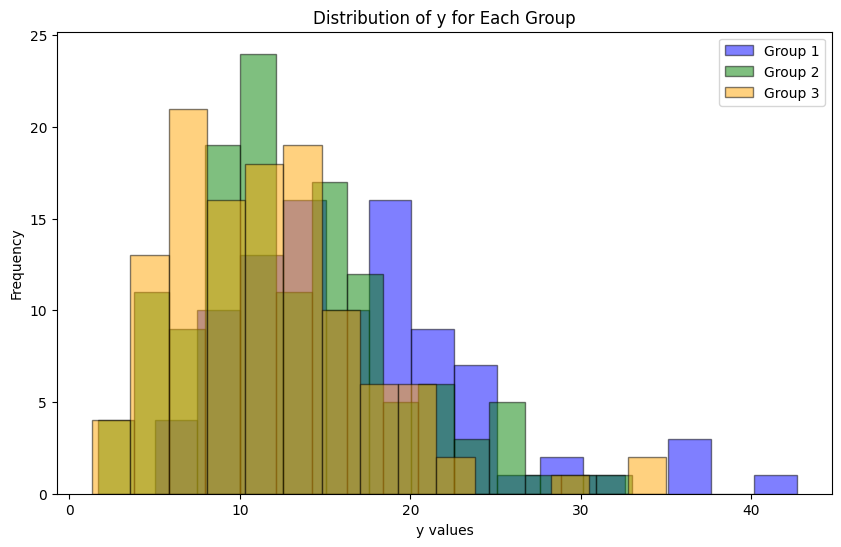

In [11]:
import numpy as np

# Example dataset for demonstration
# Assuming X is a 4D tensor, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(image_tensor, y_variable, test_size=0.3, random_state=42)

# Step 1: Apply conditions and group y based on each leaf node

# Initialize lists for each group
group_1_y = []
group_2_y = []
group_3_y = []
group_4_y = []

# Condition checks
# Leaf Node 1
indices_1 = (X_train[:, 32, 19, 34] <= 3.8721486171364994) & (X_train[:, 28, 20, 18] <= 2.165013522178203)
group_1_y = y_train[indices_1]

# Leaf Node 2
indices_2 = (X_train[:, 32, 19, 34] <= 3.8721486171364994) & (X_train[:, 28, 20, 18] > 2.165013522178203)
group_2_y = y_train[indices_2]

# Leaf Node 3
indices_3 = (X_train[:, 32, 19, 34] > 3.8721486171364994) & (X_train[:, 32, 26, 37] <= 4.602050602265279)
group_3_y = y_train[indices_3]

# Leaf Node 4
indices_4 = (X_train[:, 32, 19, 34] > 3.8721486171364994) & (X_train[:, 32, 26, 37] > 4.602050602265279)
group_4_y = y_train[indices_4]

# Step 2: Display the grouped y-values for each leaf node
print(f"Group 1 y-values: {group_1_y}")
print(f"Group 2 y-values: {group_2_y}")
print(f"Group 3 y-values: {group_3_y}")
print(f"Group 4 y-values: {group_4_y}")

# Optional: Calculate summary statistics for each group
print(f"Group 1 mean: {np.mean(group_1_y)}, samples: {len(group_1_y)}")
print(f"Group 2 mean: {np.mean(group_2_y)}, samples: {len(group_2_y)}")
print(f"Group 3 mean: {np.mean(group_3_y)}, samples: {len(group_3_y)}")
print(f"Group 4 mean: {np.mean(group_4_y)}, samples: {len(group_4_y)}")

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms with different colors for each group
plt.figure(figsize=(10, 6))

# Combined Histogram with transparency
plt.hist(group_1_y, bins=15, color='blue', edgecolor='black', alpha=0.5, label="Group 1")
plt.hist(group_2_y, bins=15, color='green', edgecolor='black', alpha=0.5, label="Group 2")
plt.hist(group_3_y, bins=15, color='orange', edgecolor='black', alpha=0.5, label="Group 3")
#plt.hist(group_4_y, bins=15, color='red', edgecolor='black', alpha=0.5, label="Group 4")

# Add labels and legend
plt.title("Distribution of y for Each Group")
plt.xlabel("y values")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.linalg import cholesky, inv
import math
import time
from functools import reduce
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from scipy.special import gammaln, logsumexp
from sklearn.linear_model import LassoCV
import itertools
from scipy.linalg import cho_factor, cho_solve
from scipy.stats import geninvgauss
def getouter_list(bet):
    d = len(bet)
    if d == 1:
        return bet[0]
    elif d == 2:
        return np.outer(bet[0], bet[1]).reshape(bet[0].shape + bet[1].shape)
    else:
        return np.outer(getouter_list(bet[:-1]), bet[-1]).reshape(getouter_list(bet[:-1]).shape + bet[-1].shape)

def getmean(X, beta, rank, rank_exclude=None):
    if rank_exclude is None:
        rank_exclude = []

    idx = [i for i in range(rank) if i not in rank_exclude]
    B_list = [getouter_list([beta_elem[r, :] for beta_elem in beta]) for r in idx]
    B = reduce(lambda x, y: x + y, B_list)
    def compute_sum(xx, bb):
        return np.sum(xx * bb)
    mu_B = np.array([compute_sum(xx, B) for xx in X])
    return mu_B

def logsum(lx):
    max_lx = np.max(lx)
    return max_lx + np.log(np.sum(np.exp(lx - max_lx)))

def TP_rankR(X_allr):
    R = X_allr[0].shape[1] if len(X_allr[0].shape) > 1 else None
    if R is None:
        return getouter_list(X_allr)
    else:
        dims = [x.shape[0] for x in X_allr]
        Y = np.zeros(dims)
        for r in range(R):
            outer_results = [x[:, r] for x in X_allr]
            Y += getouter_list(outer_results)
        return Y

def getBeta_mcmc(beta_store):
    nsweep = len(beta_store)
    d = len(beta_store[0])
    rank = beta_store[0][0].shape[0]
    p = [beta_store[0][x].shape[1] for x in range(d)]
    Beta_mcmc = np.zeros((nsweep, np.prod(p)))
    
    for i in range(nsweep):
        coef = np.zeros(np.prod(p))
        for r in range(rank):
            outer_list = [beta_store[i][x][r, :] for x in range(d)]
            coef += getouter_list(outer_list).flatten()
        Beta_mcmc[i, :] = coef    
    return Beta_mcmc

####main function####
def tensor_reg(z_train, x_train, y_train, a_lam, b_lam, phi_alpha, nsweep=1e3, rank=5, burn=0.30,
               nskip=3, scale=True, plot=False):
    
    
    n = len(y_train)
    p = x_train.shape[1:]
    d = len(x_train.shape)-1
    pgamma = z_train.shape[1]
    

    #### standarize ####
    my = np.mean(y_train)
    sy = np.std(y_train, ddof=1) if scale else 1
    if scale:
        obs = (y_train - my) / sy
    else:
        obs = y_train
    if scale:
        mz = np.mean(z_train, axis=0)
        sz = np.array([np.max(z_train[:, i]) - np.min(z_train[:, i]) for i in range(pgamma)])
        sz[sz==0] = 1
        Zt = np.zeros_like(z_train, dtype=float)
        for jj in range(pgamma):
            Zt[:,jj] = (z_train[:,jj] - mz[jj]) / sz[jj] 
    
        Xt = np.zeros_like(x_train, dtype=float)
        mx = np.mean(x_train, axis=0)
        def range_diff(z):
            return np.nanmax(z) - np.nanmin(z)
        sx = np.apply_along_axis(range_diff, axis=0, arr=x_train)
        sx[sx == 0] <- 1
   
        if d == 2:
            for jj in range(n):
                Xt[jj,:,:] = (x_train[jj,:,:] - mx) / sx
        elif d == 3:
            for jj in range(n):
                Xt[jj,:,:,:] = (x_train[jj,:,:,:] - mx) / sx
 
    else:
        Zt = z_train
        Xt = x_train








    

    x_train_nona = Xt
    #### MCMC setup ####
    ZZ = np.dot(Zt.T, Zt)
    vecXt = Xt.reshape(n, np.prod(p))
    vecXt = np.hstack((z_train, vecXt))


    las = LassoCV(cv=5).fit(vecXt, y_train)
    beta_init = las.coef_
    gam = beta_init[0:pgamma]

    ##hyper-par initialize
    a_lam = None; b_lam = None; phi_alpha = None
    if a_lam is None:
        a_lam = [3.0] * rank
        a_lam = np.array(a_lam)
    if b_lam is None:
        b_lam = a_lam**(1/(2*d))
    if phi_alpha is None:
        phi_alpha = np.array([1/rank]*rank)
    phi_a0 = np.sum(phi_alpha)
    a_vphi = phi_a0
    b_vphi = phi_alpha[1] * rank**(1/d)
    c0 = 0
    s0 = 1; a_t = 2_5/2; b_t = 2.5/2 * s0**2

    ##fix randomness for now
    tau2  = 1 / np.random.gamma(size = 1, shape = a_t, scale=1/b_t)
    #tau2 = 2
    phi = np.random.dirichlet(phi_alpha, size = 1)
    varphi = np.random.gamma(size = 1, shape = a_vphi, scale=1/b_vphi)
    #varphi = 0.5
    tau_r = phi * varphi
    # Define the flatten function
    def flatten(nested_list):
        return [item for sublist in nested_list for item in sublist]
    tau_r = flatten(tau_r)
    
    lambda_ = np.array([1.5]*rank*d).reshape((rank, d))
    omega = [None]*d
    for x in range(d):
        omega[x] = np.random.exponential(scale=.5*(a_lam[1]/b_lam[1]), size=(rank,p[x]))

    beta = [None]*d
    for x in range(d):
        beta[x] = np.random.normal(size = (rank,p[x]))

    ##initialize tensor margins
    alpha_store = [None]*nsweep
    c0_store = [None]*nsweep
    gam_store = np.array([None]*nsweep*pgamma).reshape(nsweep,pgamma)
    tau2_store = [None]*nsweep
    phi_store = np.array([None]*nsweep*rank).reshape(nsweep,rank)
    phi_store
    varphi_store = np.array([None]*nsweep*rank).reshape(-1,1)
    varphi_store
    beta_store = [[None]*d]*nsweep
    for x in range(nsweep):
        for y in range(d):
            beta_store[x][y] = np.array([None]*rank*p[y]).reshape(rank,p[y])
    beta_store
    omega_store = [[None]*d]*nsweep
    for x in range(nsweep):
        for y in range(d):
            omega_store[x][y] = np.array([None]*rank*p[y]).reshape(rank,p[y])
    lambda_store = np.array([None]*nsweep*rank*d).reshape(nsweep,rank, d)
    #hyppar_store = np.array([None]*nsweep*rank*d).reshape(nsweep,rank, 2)
    hyppar_store = np.zeros((nsweep, rank, 2))

    alam_seq = np.linspace(2.1, d + 1, num=5)
    zeta_max = np.ceil(10 * rank**(1 / (2 * d)) / 2) / 10
    zeta_seq = np.linspace(0.5, zeta_max, num=5)
    param_grid = list(itertools.product(alam_seq, zeta_seq))
    par_grid = pd.DataFrame(param_grid, columns=['alam', 'zeta'])
    alam_seq = np.linspace(2.1, d + 1, num=5)
    zeta_max = np.ceil(10 * rank**(1 / (2 * d)) / 2) / 10
    zeta_seq = np.linspace(0.5, zeta_max, num=5)
    alam_grid, zeta_grid = np.meshgrid(alam_seq, zeta_seq)
    par_grid = pd.DataFrame({
        'alam': alam_grid.flatten(),
        'zeta': zeta_grid.flatten()
    })
    par_grid = par_grid.values
    alpha_grid = np.linspace(rank**(-d), rank**(-0.1), num=10)
    M=20
    score_store = np.array([None]*nsweep*len(alpha_grid)).reshape(nsweep,len(alpha_grid))

    #### MCMC run ####
    start_time = time.time()
    for sweep in range(nsweep):
        tens_mean = getmean(x_train_nona, beta, rank)
        Cjr = np.zeros((d, rank))
        for rr in range(rank):
            for jj in range(d):
                bb = np.sum(np.abs(beta[jj][rr, :]))
                Cjr[jj, rr] = bb / np.sqrt(tau_r[rr])
                #print("Cjr[jj, rr]: ", Cjr[jj, rr])
        def mfun(z, rank, p, Cjr):
            o = [gammaln(z[0] + p[x]) - gammaln(z[0]) + z[0] * math.log(z[1] * z[0]) - (z[0] + p[x]) * math.log(z[1] * z[0] + Cjr[x][rank]) for x in range(d)]
            return sum(o)
        
        ll = np.zeros((par_grid.shape[0], rank))
        for rr in range(rank):
            for z in range(par_grid.shape[0]):
                result = mfun(par_grid[z], rr, p, Cjr)
                ll[z, rr] = result
        




        par_wt = np.apply_along_axis(lambda z: np.exp(z - logsum(z)), axis=0, arr=ll)
        #par_wt = np.apply_along_axis(lambda z: np.exp(z - np.log(np.sum(z))), axis=0, arr=ll)
        par_wt = np.nan_to_num(par_wt, nan=0.0, posinf=0.0, neginf=0.0)
        for i in range(par_wt.shape[1]):
            par_wt[:,i] = par_wt[:,i]/np.sum(par_wt[:,i])
        par_wt = np.nan_to_num(par_wt, nan=0.0, posinf=0.0, neginf=0.0)
        # Convert the cleaned NumPy array back to a list
        #cleaned_list = cleaned_array.tolist()
        #print("par_wt:", sum(par_wt)) 





        indices = np.arange(par_grid.shape[0])
        ixx = np.zeros(par_wt.shape[1], dtype=int)
        for i in range(par_wt.shape[1]):
            ixx[i] = np.random.choice(indices, size=1, p=par_wt[:, i])[0]
        
        for rr in range(rank):
            a_lam[rr] = par_grid[ixx[rr], 0]
            b_lam[rr] = par_grid[ixx[rr], 1] * a_lam[rr]
        np.set_printoptions(precision=10, suppress=False)

        ##update gamma
        diag_pgamma = np.diag(np.ones(pgamma))
        cho_factor_matrix = cho_factor(diag_pgamma + ZZ / tau2)
        Sig_g = cho_solve(cho_factor_matrix, np.eye(pgamma))
        mu_g = np.dot(Sig_g, np.dot(Zt.T, (obs - c0 - tens_mean)) / tau2)
        rnorm_pgamma = np.random.normal(size=pgamma)
        gam = mu_g + np.dot(np.linalg.cholesky(Sig_g), rnorm_pgamma)

        ## update alpha (intercept)
        pred_mean = np.dot(Zt, gam)
        mu_c0 = np.mean(obs - pred_mean - tens_mean)
        c0 = np.random.normal(loc=mu_c0, scale=np.sqrt(tau2 / n))
        
        ## update tau2
        a_tau = a_t + n / 2
        b_tau = b_t + 0.5 * np.sum((obs - c0 - pred_mean - tens_mean)**2)
        tau2 = 1 / stats.gamma.rvs(a=a_tau, scale=1/b_tau)

        ## update (alpha, phi, varphi)
        def draw_phi_tau(alpha_grid):
            length = len(alpha_grid)

            # Precompute Cr matrix
            Cr = np.array([
                [
                    np.dot(beta[jj][rr, :], np.dot(np.diag(1 / omega[jj][rr, :]), beta[jj][rr, :]))
                    for rr in range(rank)
                ]
                for jj in range(d)
            ])

            def score_fn(phi_alpha, phi_s, varphi_s, Cstat):
                def ldirdens(v, a):
                    c1 = gammaln(np.sum(a))
                    c2 = np.sum(gammaln(a))
                    return (c1 - c2) + np.sum((a - 1) * np.log(np.maximum(v, 1e-10)))  

                ldir = np.apply_along_axis(ldirdens, 1, phi_s, a=phi_alpha)

                lvarphi = stats.gamma.logpdf(varphi_s, a=np.sum(phi_alpha), scale=1/b_vphi)
                
                dnorm_log = -np.sum(Cstat, axis=1) / (2 * np.maximum(varphi_s, 1e-10)) 
                dnorm_log -= (np.sum(p) / 2) * np.array([np.sum(np.log(np.maximum(varphi_s[ii] * phi_s[ii, :], 1e-10))) for ii in range(len(varphi_s))])  # Avoid log(0)
                
                return dnorm_log + ldir + lvarphi

            if length > 1:
                phi = np.zeros((M * length, rank))
                varphi = np.zeros((M * length, 1))
                Cstat = np.zeros((M * length, rank))
                
                for jj in range(length):
                    m_phialpha = np.full(rank, alpha_grid[jj])
                    m_phia0 = np.sum(m_phialpha)
                    m_avphi = m_phia0

                    # Draw phi
                    Cr1 = np.sum(Cr, axis=0)
                    phi_a = np.array([geninvgauss.rvs(m_phialpha[rr] - np.sum(p)/2, Cr1[rr], scale=2 * b_vphi, size=M) for rr in range(rank)]).T
                    phi_a = np.apply_along_axis(lambda z: z / np.sum(z), 1, phi_a)

                    # Draw varphi
                    Cr2 = np.apply_along_axis(lambda z: Cr1 / np.maximum(z, 1e-10), 1, phi_a)  # Avoid division by zero
                    varphi_a = np.array([geninvgauss.rvs(m_avphi - rank * np.sum(p)/2, 2 * b_vphi, scale=np.sum(z)) for z in Cr2]).flatten()

                    phi[jj * M:(jj + 1) * M, :] = phi_a
                    varphi[jj * M:(jj + 1) * M, 0] = varphi_a
                    Cstat[jj * M:(jj + 1) * M, :] = Cr2

                scores = [score_fn(np.full(rank, z), phi, varphi, Cstat) for z in alpha_grid]
                scores = np.array(scores)
                lmax = np.max(scores)
                normalized_scores = np.array([np.mean(np.exp(score - lmax)) for score in scores])
                normalized_scores /= np.sum(normalized_scores)  # Ensure scores sum to 1
            else:
                m_phialpha = np.full(rank, alpha_grid[0])
                m_phia0 = np.sum(m_phialpha)
                m_avphi = m_phia0

                Cr1 = np.sum(Cr, axis=0)

                # Draw phi
                phi = np.array([geninvgauss.rvs(m_phialpha[rr] - np.sum(p) / 2, 2 * b_vphi, scale=Cr1[rr], size=1) for rr in range(rank)]).flatten()
                phi = phi / np.sum(phi)

                # Draw varphi
                Cr2 = Cr1 / np.maximum(phi, 1e-10)  # Avoid division by zero
                varphi = geninvgauss.rvs(m_avphi - rank * np.sum(p) / 2, 2 * b_vphi, scale=np.sum(Cr2), size=1)

                scores = score_fn(m_phialpha, np.array([phi]), np.array([varphi]), np.array([Cr2]))
                scores = np.array([scores])
                lmax = np.max(scores)
                normalized_scores = np.array([np.mean(np.exp(scores - lmax))])
                normalized_scores /= np.sum(normalized_scores)  # Ensure scores sum to 1

            return {'phi': phi, 'varphi': varphi, 'scores': normalized_scores}
        ## sample astar
        o = draw_phi_tau(alpha_grid)
        scores = o['scores']
        normalized_scores = scores / np.sum(scores)
        astar = np.random.choice(alpha_grid, size=1, p=normalized_scores)
        score_store[sweep, :] = normalized_scores

        # Sample (phi, varphi) based on astar
        o = draw_phi_tau(astar)
        phi = o['phi']
        varphi = o['varphi']

        # Calculate tau.r
        tau_r = varphi * phi
        #print("tau_r: ", tau_r)
        # Define phi.alpha, phi.a0, and a.vphi
        phi_alpha = np.full(rank, astar)
        phi_a0 = np.sum(phi_alpha)
        a_vphi = phi_a0

        ## update rank specific params
        lambda_ = np.zeros((rank, len(beta)))
        for r in range(rank):
            for j in range(d):
                tens_mu_r = getmean(x_train_nona, beta, rank, [r])
                    
                betj = getouter_list([beta_elem[r, :] for k, beta_elem in enumerate(beta) if k != j])
                    
                H = np.full((n, p[j]), np.nan)
                for i in range(n):
                    if d == 2:
                        if j == 0:
                            H[i, :] = [np.sum(x_train_nona[i, k, :] * betj) for k in range(p[j])]
                        elif j == 1:
                                H[i, :] = [np.sum(x_train_nona[i, :, k] * betj) for k in range(p[j])]
                    elif d == 3:
                        if j == 0:
                            H[i, :] = [np.sum(x_train_nona[i, k, :, :] * betj) for k in range(p[j])]
                        elif j == 1:
                            H[i, :] = [np.sum(x_train_nona[i, :, k, :] * betj) for k in range(p[j])]
                        elif j == 2:
                            H[i, :] = [np.sum(x_train_nona[i, :, :, k] * betj) for k in range(p[j])]
                #print("H: ", H)
                HH = np.dot(H.T, H)
                #print("HH: ", HH)
                diag_elements = 1 / omega[j][r, :] / tau_r[r]
                diag_matrix = np.diag(diag_elements)
                #print("HH / tau2 + diag_matrix: ", HH / tau2 + diag_matrix)
                chol_matrix = cholesky(HH / tau2 + diag_matrix)
                K = inv(chol_matrix.T @ chol_matrix)
                #K = inv(chol_matrix)
                #print("K:", K)
                
                ##update betas
                mm = obs - c0 - pred_mean - tens_mu_r
                bet_mu_jr = K @ ((H.T/tau2)@ mm)
                chol_K = cholesky(K, lower=True)
                beta[j][r, :] = bet_mu_jr + chol_K @ np.random.randn(p[j])

                ## update lambda.jr
                shape = a_lam[r] + p[j]
                rate = b_lam[r] + np.sum(np.abs(beta[j][r, :])) / np.sqrt(tau_r[r]) 
                lambda_[r, j] = np.random.gamma(shape, 1.0 / rate)
                ## update omega.jr
                omega[j][r, :] = [geninvgauss.rvs(0.5, beta[j][r, kk]**2 / tau_r[r], scale=lambda_[r, j]**2) for kk in range(p[j])]
        
        ## store params
        tau2_store[sweep] = tau2
        c0_store[sweep] = c0
        if z_train is not None:
            gam_store[sweep, :] = gam
        else:
            gam_store[sweep] = gam
        alpha_store[sweep] = astar
        phi_store[sweep, :] = phi
        varphi_store[sweep, :] = varphi
        beta_store[sweep] = beta
        omega_store[sweep] = omega
        lambda_store[sweep, :, :] = lambda_
        for rr in range(rank):
            hyppar_store[sweep, rr, :] = [a_lam[rr], b_lam[rr]]


        
        
        #if sweep % 5 == 0:
            #print(f"{sweep}, tau2: {tau2 * sy**2:.3f}, (alpha, a.lam, b.lam): {astar:.3f}, {a_lam[r]:.3f}, {b_lam[r]:.3f}")
    
    # Example time-consuming operation
    time.sleep(0.01)
    end_time = time.time()
    elapsed_time = abs(end_time - start_time)
    print('Time out:', elapsed_time)

    out = {
    "nsweep": nsweep,
    "rank": rank,
    "p": p,
    "d": d,
    "par_grid": par_grid,
    "alpha_grid": alpha_grid,
    "my": my,
    "sy": sy,
    "mz": mz,
    "sz": sz,
    "mx": mx,
    "sx": sx,
    "Zt": Zt,
    "Xt": Xt,
    "obs": obs,
    "a_t": a_t,
    "b_t": b_t,
    "tau2_store": tau2_store,
    "c0_store": c0_store,
    "gam_store": gam_store,
    "alpha_store": alpha_store,
    "beta_store": beta_store,
    "phi_store": phi_store,
    "varphi_store": varphi_store,
    "omega_store": omega_store,
    "lambda_store": lambda_store,
    "hyppar_store": hyppar_store,
    "score_store": score_store,
    "time": elapsed_time
    }
    return out


In [ ]:
indices_1 = (X_train[:, 32, 19, 34] <= 3.8721486171364994) & (X_train[:, 28, 20, 18] <= 2.165013522178203)
group_1_y = y_train[indices_1]

# Leaf Node 2
indices_2 = (X_train[:, 32, 19, 34] <= 3.8721486171364994) & (X_train[:, 28, 20, 18] > 2.165013522178203)
group_2_y = y_train[indices_2]

# Leaf Node 3
indices_3 = (X_train[:, 32, 19, 34] > 3.8721486171364994) & (X_train[:, 32, 26, 37] <= 4.602050602265279)
group_3_y = y_train[indices_3]

# Leaf Node 4
indices_4 = (X_train[:, 32, 19, 34] > 3.8721486171364994) & (X_train[:, 32, 26, 37] > 4.602050602265279)
group_4_y = y_train[indices_4]

In [20]:
z = np.zeros((len(indices_1), 1))
z.shape

(571, 1)

In [19]:
X_train[indices_1].shape

(93, 48, 48, 48)

In [23]:
z = np.zeros((93, 1))
from skimage.measure import block_reduce
X_coarsen_shape = (1,4,4,4)
X_coarsen_func = np.mean
X_train_c = block_reduce(X_train[indices_1],block_size=X_coarsen_shape, func=X_coarsen_func)
#X_test_c = block_reduce(X_test,block_size=X_coarsen_shape, func=X_coarsen_func)
X_train_c = X_train_c + np.random.randn(*X_train_c.shape) * 1e-3
nsweep = 1000
rank = 6
burn = 0.3
nskip = 1
nsamp = int(np.floor((1 - burn) * nsweep / nskip))
ss = np.ceil(np.linspace(burn, 1, nsamp) * nsweep).astype(int) - 1  # adjust for 0-based indexing
out = tensor_reg(z_train=z.reshape(len(z),1), x_train = X_train_c, y_train = group_1_y, nsweep = nsweep, rank = rank, burn = burn, nskip = nskip, scale=True, a_lam= None, b_lam=None, phi_alpha=None, plot=True)

# Compute Beta_mcmc
Beta_mcmc = getBeta_mcmc(out['beta_store'])
# Compute Beta_est
p = [out["beta_store"][0][x].shape[1] for x in range(len(out["beta_store"][0]))]

Beta_est = (out['sy'] / out['sx']) * np.mean(Beta_mcmc[ss, :], axis=0).reshape(p)

Time out: 123.75880599021912


In [24]:
err = 0
for i in range(X_train_c.shape[0]):
    err += (np.tensordot(X_train_c[i], Beta_est, axes=((0, 1, 2), (0, 1, 2)))-y_train[i])**2
mse = err/X_train_c.shape[0]
rmse = mse/np.var(y_train)
print(rmse)

8.161333927049805


In [26]:
z = np.zeros((129, 1))
from skimage.measure import block_reduce
X_coarsen_shape = (1,4,4,4)
X_coarsen_func = np.mean
X_train_c = block_reduce(X_train[indices_2],block_size=X_coarsen_shape, func=X_coarsen_func)
#X_test_c = block_reduce(X_test,block_size=X_coarsen_shape, func=X_coarsen_func)
X_train_c = X_train_c + np.random.randn(*X_train_c.shape) * 1e-4
nsweep = 1000
rank = 6
burn = 0.3
nskip = 1
nsamp = int(np.floor((1 - burn) * nsweep / nskip))
ss = np.ceil(np.linspace(burn, 1, nsamp) * nsweep).astype(int) - 1  # adjust for 0-based indexing
out = tensor_reg(z_train=z.reshape(len(z),1), x_train = X_train_c, y_train = group_2_y, nsweep = nsweep, rank = rank, burn = burn, nskip = nskip, scale=True, a_lam= None, b_lam=None, phi_alpha=None, plot=True)

# Compute Beta_mcmc
Beta_mcmc = getBeta_mcmc(out['beta_store'])
# Compute Beta_est
p = [out["beta_store"][0][x].shape[1] for x in range(len(out["beta_store"][0]))]

Beta_est = (out['sy'] / out['sx']) * np.mean(Beta_mcmc[ss, :], axis=0).reshape(p)
err = 0
for i in range(X_train_c.shape[0]):
    err += (np.tensordot(X_train_c[i], Beta_est, axes=((0, 1, 2), (0, 1, 2)))-y_train[i])**2
mse = err/X_train_c.shape[0]
rmse = mse/np.var(y_train)
print(rmse)

Time out: 142.89861702919006
5.6446546921430265


In [29]:
z = np.zeros((118, 1))
from skimage.measure import block_reduce
X_coarsen_shape = (1,4,4,4)
X_coarsen_func = np.mean
X_train_c = block_reduce(X_train[indices_3],block_size=X_coarsen_shape, func=X_coarsen_func)
#X_test_c = block_reduce(X_test,block_size=X_coarsen_shape, func=X_coarsen_func)
X_train_c = X_train_c + np.random.randn(*X_train_c.shape) * 1e-4
nsweep = 1000
rank = 6
burn = 0.3
nskip = 1
nsamp = int(np.floor((1 - burn) * nsweep / nskip))
ss = np.ceil(np.linspace(burn, 1, nsamp) * nsweep).astype(int) - 1  # adjust for 0-based indexing
out = tensor_reg(z_train=z.reshape(len(z),1), x_train = X_train_c, y_train = group_3_y, nsweep = nsweep, rank = rank, burn = burn, nskip = nskip, scale=True, a_lam= None, b_lam=None, phi_alpha=None, plot=True)

# Compute Beta_mcmc
Beta_mcmc = getBeta_mcmc(out['beta_store'])
# Compute Beta_est
p = [out["beta_store"][0][x].shape[1] for x in range(len(out["beta_store"][0]))]

Beta_est = (out['sy'] / out['sx']) * np.mean(Beta_mcmc[ss, :], axis=0).reshape(p)
err = 0
for i in range(X_train_c.shape[0]):
    err += (np.tensordot(X_train_c[i], Beta_est, axes=((0, 1, 2), (0, 1, 2)))-y_train[i])**2
mse = err/X_train_c.shape[0]
rmse = mse/np.var(y_train)
print(rmse)

Time out: 137.30868315696716
12.835545523109538


In [30]:
z = np.zeros((231, 1))
from skimage.measure import block_reduce
X_coarsen_shape = (1,4,4,4)
X_coarsen_func = np.mean
X_train_c = block_reduce(X_train[indices_4],block_size=X_coarsen_shape, func=X_coarsen_func)
#X_test_c = block_reduce(X_test,block_size=X_coarsen_shape, func=X_coarsen_func)
X_train_c = X_train_c + np.random.randn(*X_train_c.shape) * 1e-4
nsweep = 1000
rank = 6
burn = 0.3
nskip = 1
nsamp = int(np.floor((1 - burn) * nsweep / nskip))
ss = np.ceil(np.linspace(burn, 1, nsamp) * nsweep).astype(int) - 1  # adjust for 0-based indexing
out = tensor_reg(z_train=z.reshape(len(z),1), x_train = X_train_c, y_train = group_4_y, nsweep = nsweep, rank = rank, burn = burn, nskip = nskip, scale=True, a_lam= None, b_lam=None, phi_alpha=None, plot=True)

# Compute Beta_mcmc
Beta_mcmc = getBeta_mcmc(out['beta_store'])
# Compute Beta_est
p = [out["beta_store"][0][x].shape[1] for x in range(len(out["beta_store"][0]))]

Beta_est = (out['sy'] / out['sx']) * np.mean(Beta_mcmc[ss, :], axis=0).reshape(p)
err = 0
for i in range(X_train_c.shape[0]):
    err += (np.tensordot(X_train_c[i], Beta_est, axes=((0, 1, 2), (0, 1, 2)))-y_train[i])**2
mse = err/X_train_c.shape[0]
rmse = mse/np.var(y_train)
print(rmse)

Time out: 196.3312587738037
5.10881059714307
